[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/samdavanloo/ISE-ML/blob/main/1_linear_regression.ipynb)

# A Linear Regression

## Housing
We will load the Housing dataset using the pandas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',
header=None,sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(type(df))
print(df.head())
s=range(3)

## Exploratory Data Analysis (EDA)
### Scatter plot
First, we will create a scatterplot matrix that allows us to visualize the pair-wise
correlations between the different features in this dataset in one place.

Using this scatterplot matrix, we can quickly eyeball how the data is distributed
and whether it contains outliers. For example, we can see that there is a linear
relationship between RM and house prices, MEDV (the fifth column of the fourth row). Furthermore, we can see in the histogram that the MEDV variable seems to be normally distributed but contains several outliers.


/Users/samtajbakhsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


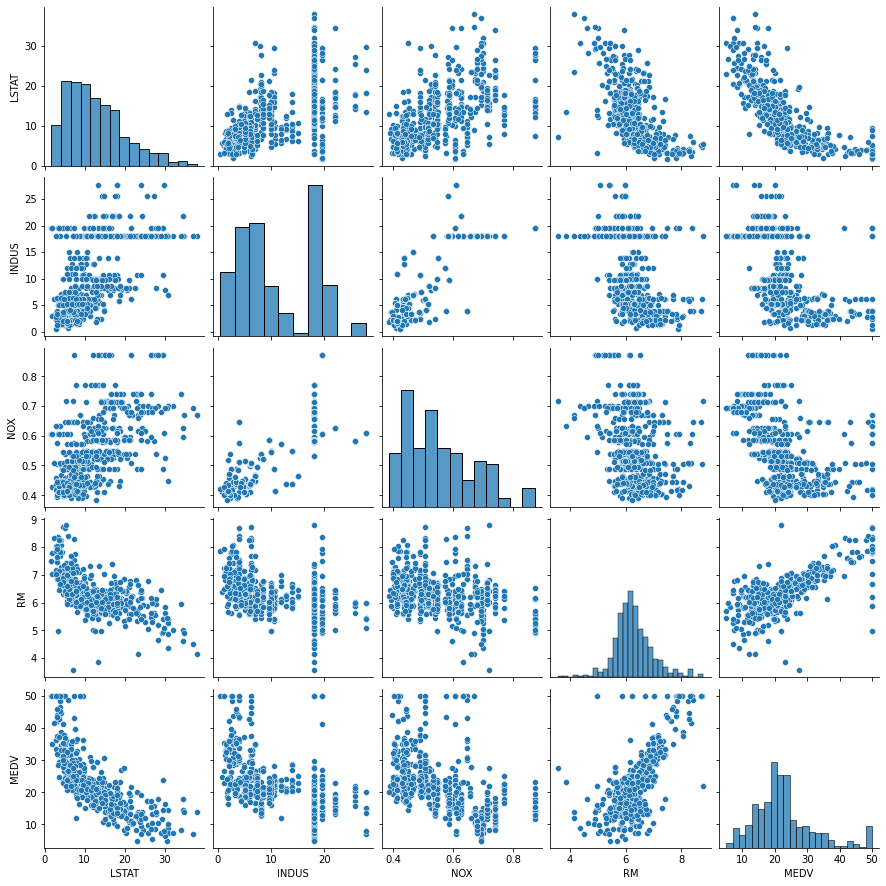

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
#plt.tight_layout()
plt.show()

### Correlatin matrix
Next, we will create a correlation matrix to quantify and summarize linear relationships between variables. The correlation matrix is
identical to a covariance matrix computed from standardized features. Two features have a perfect positive correlation if r =1, no correlation if r = 0 ,
and a perfect negative correlation if r = −1. 

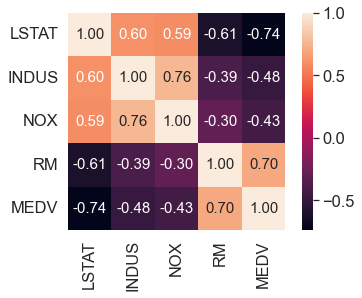

In [3]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

## Ordinary Least Square (OLS)
### Gradient Descent (GD) implementation
We will take an object-oriented approach to define linear regression model as a Python class. Learning the parameters is performed via the "fit" method. The optimzation problem to lean the parameters $\mathbf{w}\in\mathbb{R}^p$ and $w_0\in\mathbb{R}$ is
$$
\min_{\mathbf{w},w_0} \mathcal{L}(\mathbf{w},w_0)\triangleq\frac{1}{2}||\mathbf{y}-X\mathbf{w}-w_0\mathbf{1}_n||_2^2,
$$
where the data is $X\in\mathbb{R}^{n\times p}$ and $\mathbf{y}\in\mathbb{R}^n$.

The optimization is performed by the Gradient Descent (GD) algortim in form of 
$$
\bar{\mathbf{w}}^{t+1} \gets \bar{\mathbf{w}}^t - \eta \nabla \cal{L}(\bar{\mathbf{w}}^t),
$$
where $\bar{\mathbf{w}}=(\mathbf{w}^T,w_0)^T$. Hence, the algorithm requires gradient of the objective function w.r.t. $\mathbf{w}$ and $w_0$ which are provided below:
\begin{align*}
\nabla_{\mathbf{w}}\cal{L} &= -X^T(\mathbf{y}-X\mathbf{w}-w_0\mathbf{1}_n) \\
\nabla_{w_0}\cal{L} &= -\mathbf{1}^T(\mathbf{y}-X\mathbf{w}-w_0\mathbf{1}_n)
\end{align*}

In the code below, $X^T\mathbf{w}+w_0$ is denoted by "output", and $\mathbf{y}-X^\mathbf{w}-w_0$ by "error".

In [6]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  #As a convention, we append an underscore (_) to attributes that are not being created
                                                #upon the initialization of the object but by calling the object's other methods.
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)


Next, we use the "RM" (number of rooms) variable from the Housing dataset as the explanatory variable and train a
model that can predict "MEDV" (house prices). Furthermore, we will standardize the variables for better convergence of the GD algorithm.

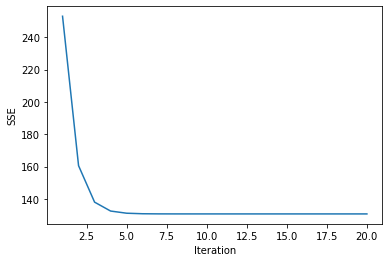

In [7]:
X = df[['RM']].values
type(X)
y = df['MEDV'].values
type(y)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() #instanciate the class
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() #create a column vector, standarzize, then (falatten) put back as an array.
lr = LinearRegressionGD() #instaniate the class
lr.fit(X_std, y_std)

sns.reset_orig() # resets matplotlib style
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Iteration')
plt.show()


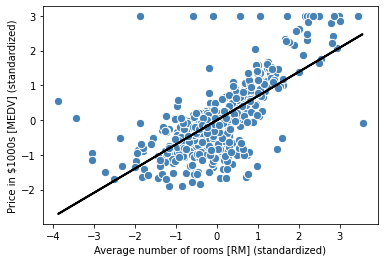

In [8]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

Lastely, let's use the model for prediction:

In [7]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print(sc_y.inverse_transform(price_std.reshape(-1,1)))

[[10.83993289]]


### Fitting Regression model using scikit-learn
In the previous section, we implemented a working model for regression analysis;
however, in a real-world application we may be interested in more efficient
implementations

In [9]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression() #instanciate the class
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


As we can see from executing this code, scikit-learn's LinearRegression model,
fitted with the unstandardized RM and MEDV variables, yielded different model
coefficients. Let's compare it to our GD implementation by plotting MEDV against RM.

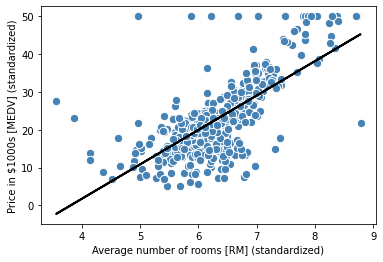

In [10]:
lin_regplot(X, y, slr) # function defined above
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

As we can see, the overall result looks identical to our GD implementation.